# 4 Coding for SVM {-}

### 4.1 {-}

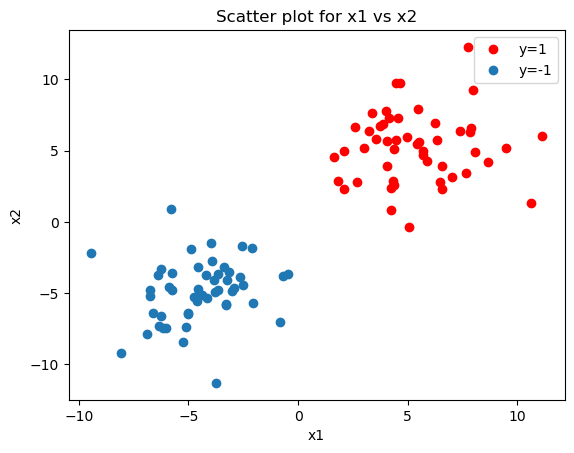

In [86]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import math

a, b = np.random.multivariate_normal([5,5], [[5,0],[0,5]], 50).T
plt.plot(a, b, 'o', c='r', label="y=1")
#pos_df = pd.DataFrame({'x1':a, 'x2':b, 'y':[1]*len(a)})
pos_arr = np.array([a, b, np.repeat(1,len(a))])
pos_arr = pos_arr.T
x_max = max(a)

c, d = np.random.multivariate_normal([-5,-5], [[5,0],[0,5]], 50).T
plt.plot(c, d, 'o', label="y=-1")
#neg_df = pd.DataFrame({'x1':c, 'x2':d, 'y':[-1]*len(c)})
neg_arr = np.array([c, d, np.repeat(-1,len(c))])
neg_arr = neg_arr.T
x_min = min(c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot for x1 vs x2')
plt.legend(loc="upper right")



data = np.vstack((pos_arr, neg_arr))


### 4.2 {-}

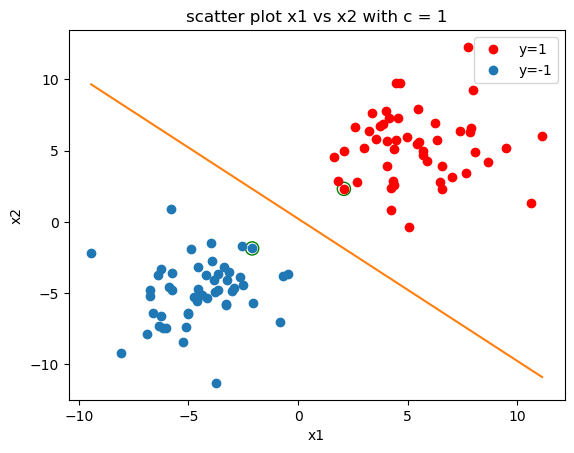

In [87]:
X = data[:, 0:2]
y = data[:, 2:3]

plt.plot(X[:50, 0], X[:50, 1], 'o', c='r', label="y=1")
plt.plot(X[50:, 0], X[50:, 1], 'o', label="y=-1")


svm = SVC(C=1, kernel='linear')
svm.fit(X,y.ravel())

sv = svm.support_vectors_

# get coefficients from fitted model
w = svm.coef_[0] 
b = svm.intercept_
plt.scatter(sv[:, 0], sv[:, 1], s=90, facecolors='none', edgecolors='g')

# create decision boundry
x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]
plt.plot(x_vals, y_vals)
plt.title('scatter plot x1 vs x2 with c = 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.show()



### 4.3 {-}

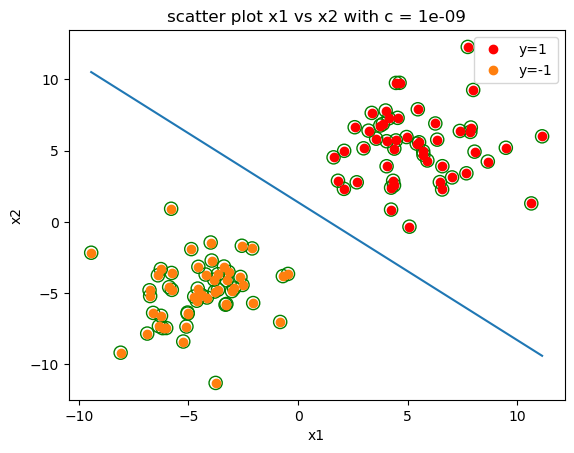

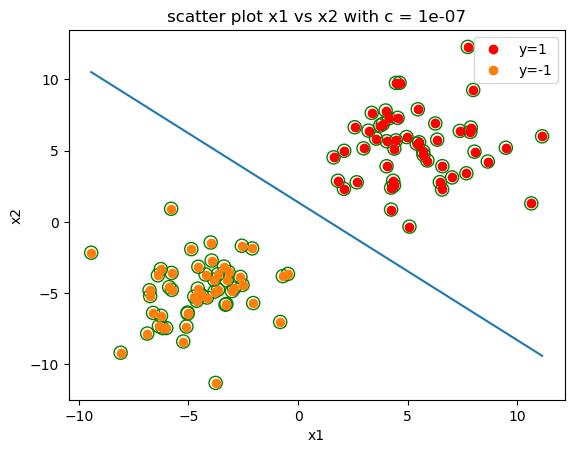

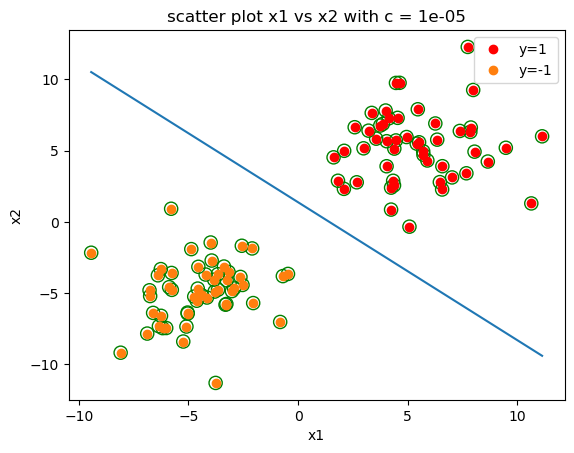

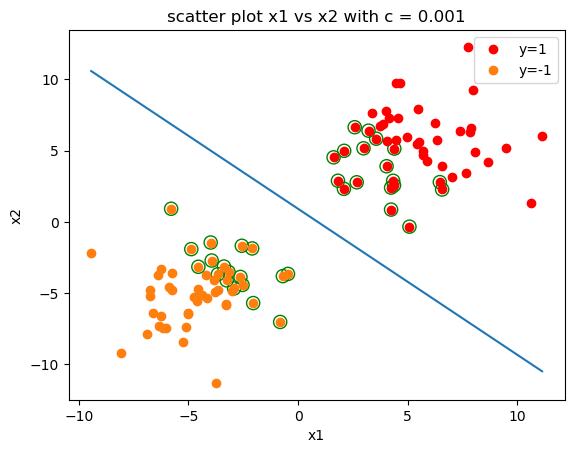

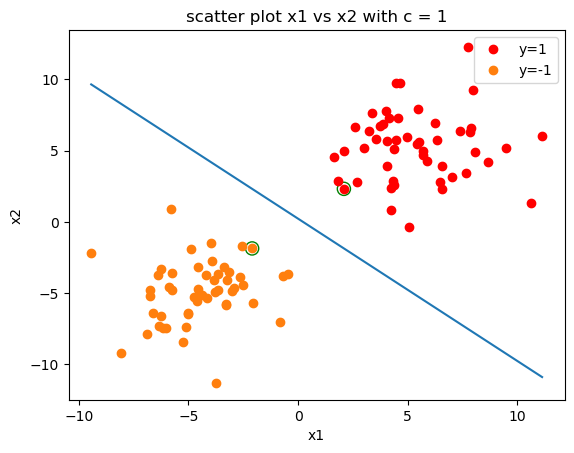

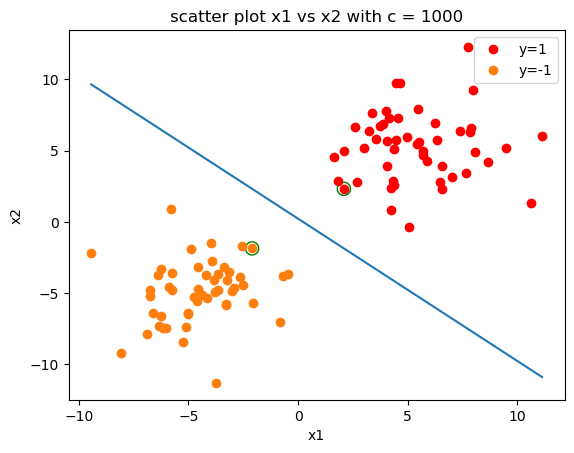

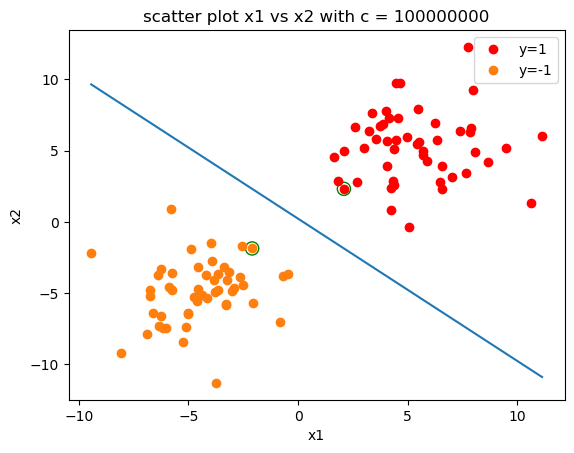

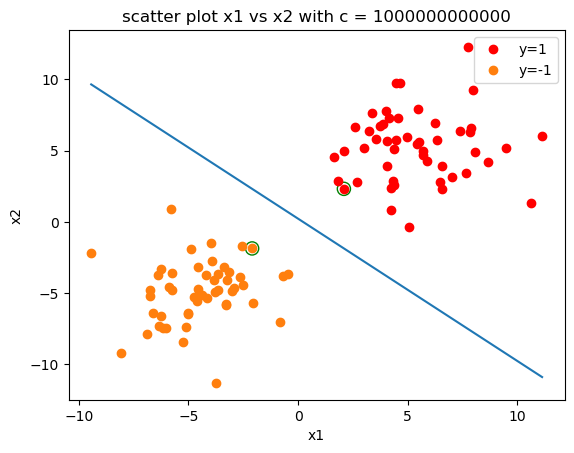

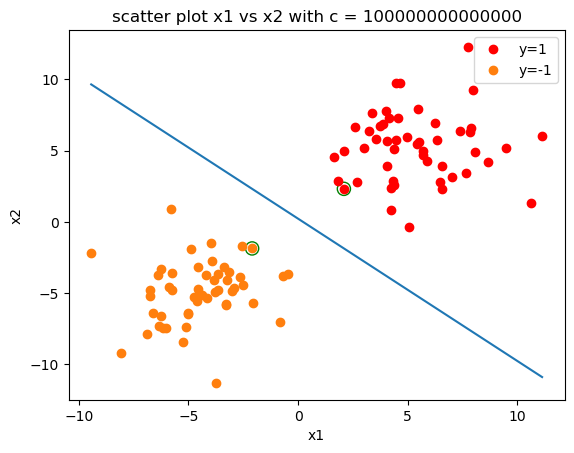

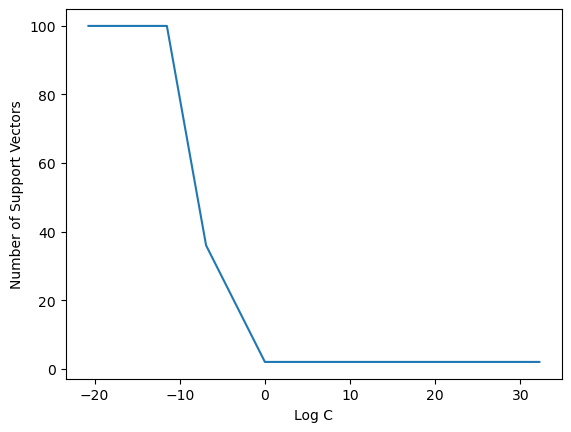

In [88]:
# C values to iterate over
c_vals = [.000000001, .0000001, .00001, .001, 1, 1000, 100000000, 1000000000000, 100000000000000]
num_sv = []

for c in c_vals:
    svm_mod = SVC(C=c, kernel='linear')

    
    #print(svm_mod.C)
    #print(X)
    #print(y)
    svm_mod.fit(X,y.ravel())

    sv = svm_mod.support_vectors_
    #print(sv)
    num_sv.append(len(sv))

    w = svm_mod.coef_[0]
    b = svm_mod.intercept_

    x_vals = np.linspace(x_min, x_max, 100)
    
    y_vals = -(w[0] / w[1]) * x_vals - b / w[1]
    plt.scatter(sv[:, 0], sv[:, 1], s=90, facecolors='none', edgecolors='g')
    plt.plot(x_vals, y_vals)
    plt.plot(X[:50, 0], X[:50, 1], 'o', c='r', label="y=1")
    plt.plot(X[50:, 0], X[50:, 1], 'o', label="y=-1")
    plt.title(f'scatter plot x1 vs x2 with c = {c}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper right')

    plt.show()



#plt.show()

#print(num_sv)
c_log = [math.log(v) for v in c_vals]
#plt.scatter(num_sv, c_log, s=90, facecolors='none', edgecolors='g')
plt.plot(c_log, num_sv)
plt.xlabel("Log C")
plt.ylabel("Number of Support Vectors")
plt.show()

### 4.4 {-}

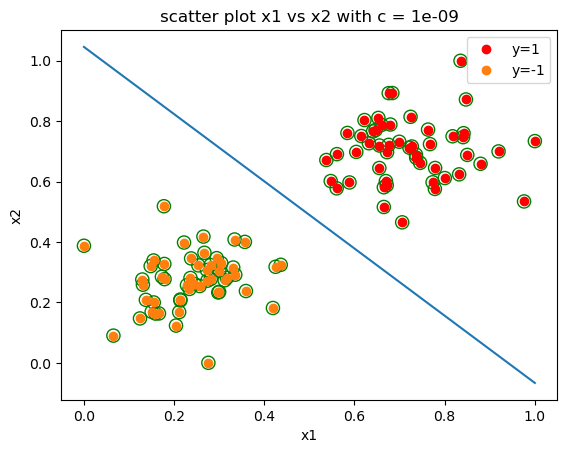

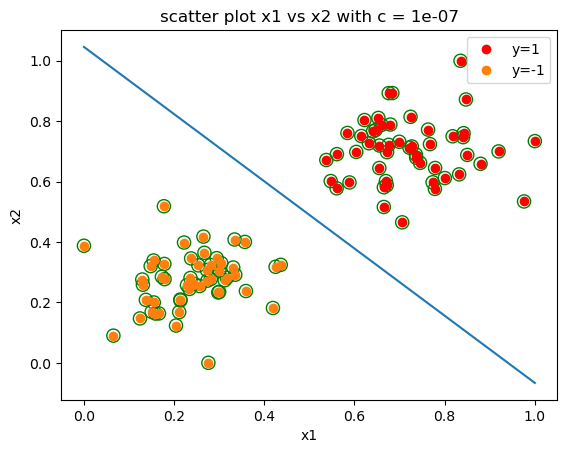

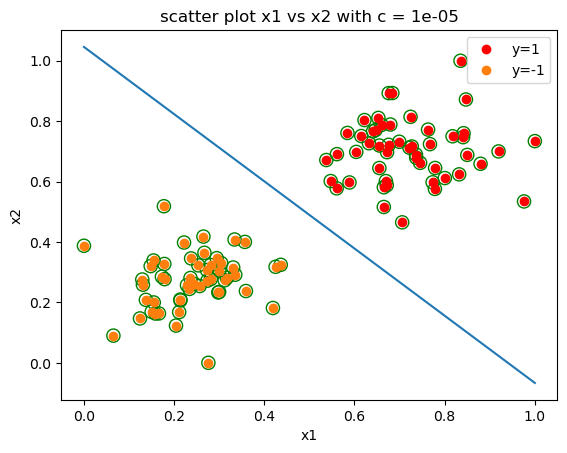

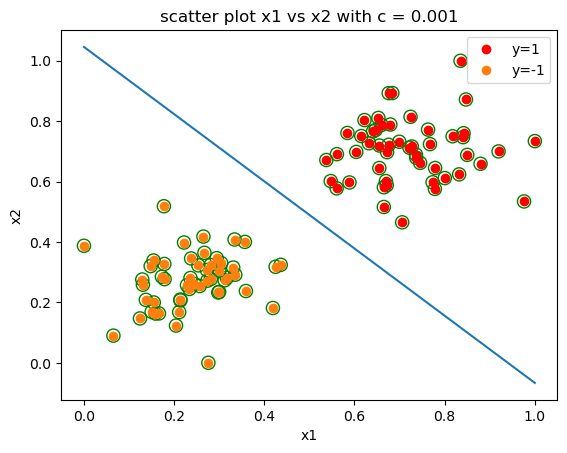

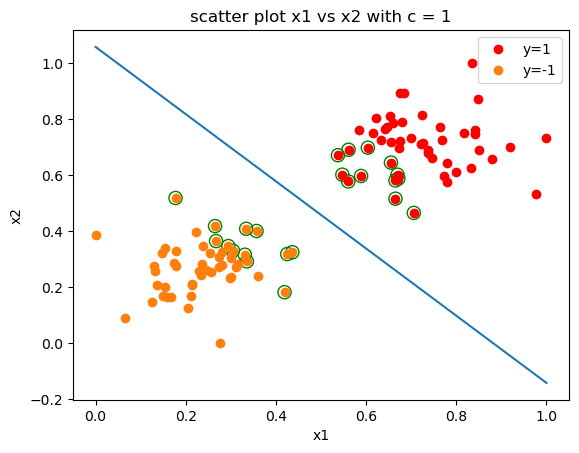

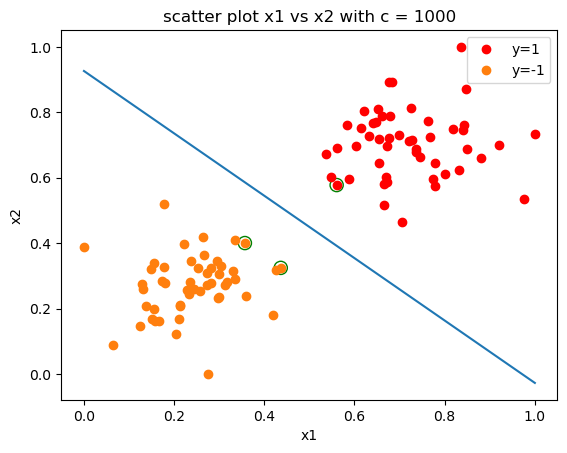

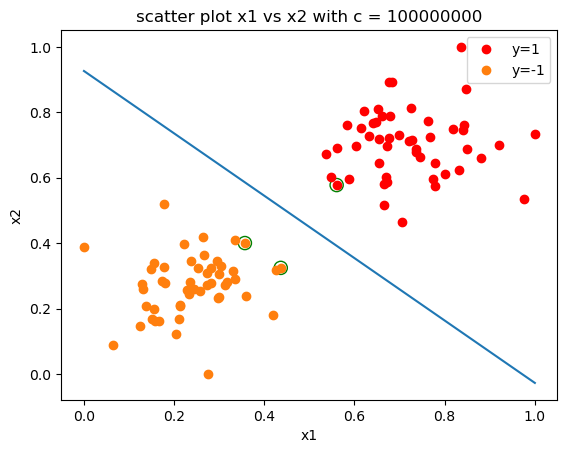

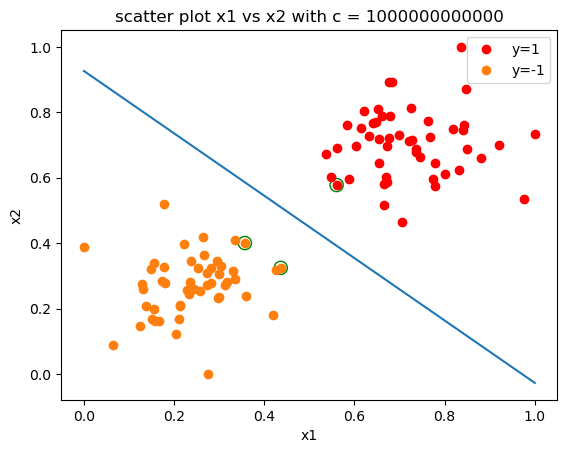

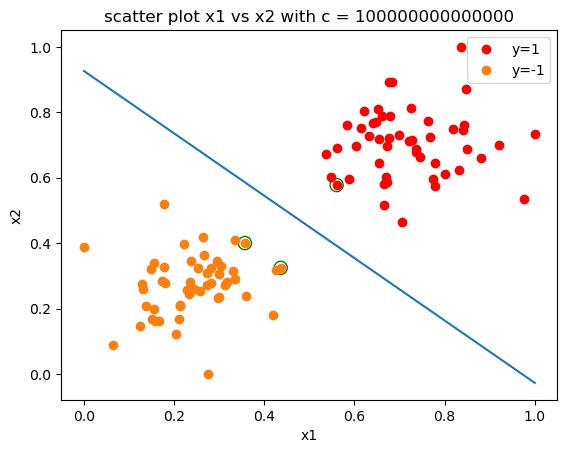

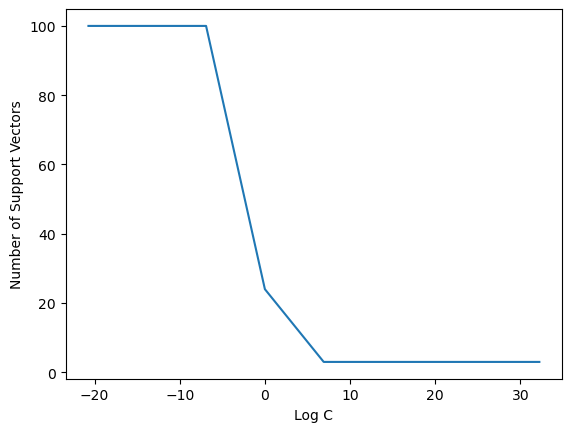

In [89]:
# scale predictor variables
x1_scale = np.interp(X[:, 0], (X[:, 0].min(), X[:, 0].max()), (0, +1))
x2_scale = np.interp(X[:, 1], (X[:, 1].min(), X[:, 1].max()), (0, +1))
X_scale = np.vstack((x1_scale, x2_scale)).T

# C values to iterate over
c_vals = [.000000001, .0000001, .00001, .001, 1, 1000, 100000000, 1000000000000, 100000000000000]
num_sv = []
x_min = 0
x_max = 1
for c in c_vals:
    svm_mod = SVC(C=c, kernel='linear')

    
    svm_mod.fit(X_scale,y.ravel())

    sv = svm_mod.support_vectors_
    #print(sv)
    num_sv.append(len(sv))

    w = svm_mod.coef_[0]
    b = svm_mod.intercept_

    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(w[0] / w[1]) * x_vals - b / w[1]
    plt.scatter(sv[:, 0], sv[:, 1], s=90, facecolors='none', edgecolors='g')
    plt.plot(x_vals, y_vals)
    plt.plot(X_scale[:50, 0], X_scale[:50, 1], 'o', c='r', label="y=1")
    plt.plot(X_scale[50:, 0], X_scale[50:, 1], 'o', label="y=-1")
    plt.title(f'scatter plot x1 vs x2 with c = {c}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper right')

    plt.show()

    



c_log = [math.log(v) for v in c_vals]

plt.plot(c_log, num_sv)
plt.xlabel("Log C")
plt.ylabel("Number of Support Vectors")
plt.show()

### 4.5 {-}

Text(0.5, 1.0, 'Decision Boundary with Unscaled Points')

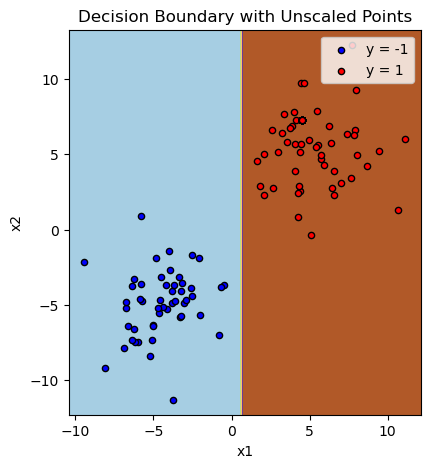

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=50
)

bdt.fit(X, y.ravel())

plot_colors = "br"
plot_step = 0.02
class_names = ['-1', '1']

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x1",
    ylabel="x2",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

# Plot the training points
for i, n, c in zip([-1,1], class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="y = %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary with Unscaled Points")

Text(0.5, 1.0, 'Decision Boundary with Scaled Points')

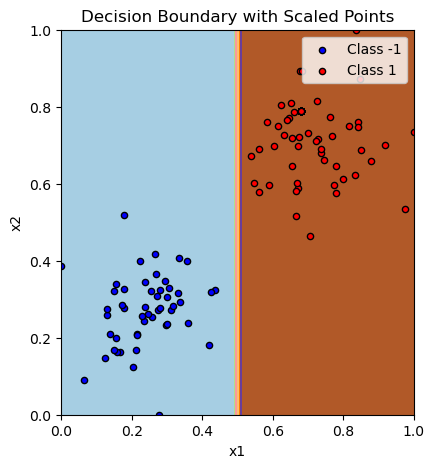

In [94]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=50
)

bdt.fit(X_scale, y.ravel())

plot_colors = "br"
plot_step = 0.02
class_names = ['-1', '1']

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X_scale,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x1",
    ylabel="x2",
)
x_min = 0
y_min = 0
x_max = 1
y_max = 1

plt.axis("tight")

# Plot the training points
for i, n, c in zip([-1,1], class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X_scale[idx, 0],
        X_scale[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary with Scaled Points")